# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Loading Dataset and performing preprocessing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/SVM/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<Axes: >

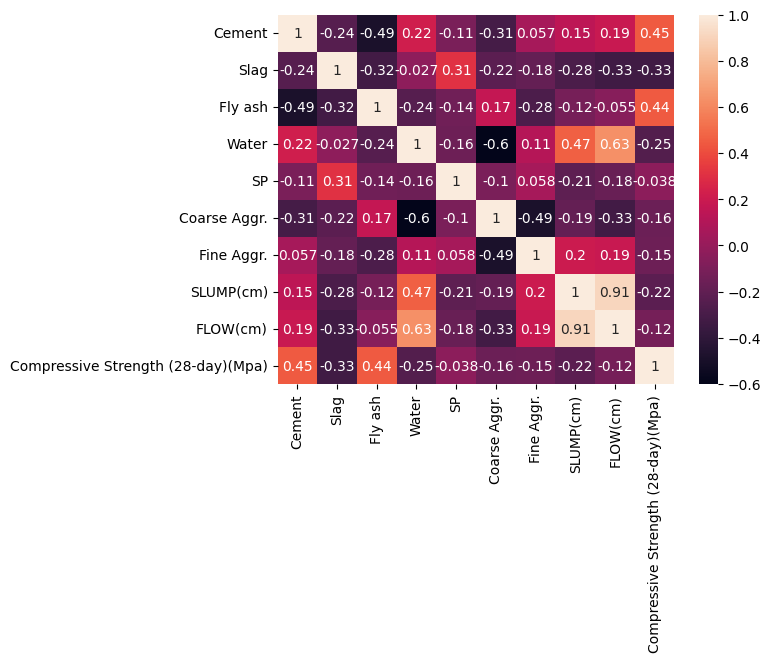

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

# Splitting dataset for training and testing

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size = 0.2)

# Scaling of data

In [9]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


# Machine Learning

In [11]:
svr = SVR()
svr

SVR()

In [12]:
parameters = {
    'kernel':["rbf",'linear','poly'],
    "C":[0.001,0.01,0.1,0.5,1,5,10,50,100],
    "gamma":["auto","scale"],
    "epsilon":[0.001,0.01,0.1,0.5,1]
}

In [13]:
grid = GridSearchCV(svr,param_grid=parameters,scoring="neg_mean_squared_error",cv=5)
grid.fit(x_train_scaled,y_train)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [14]:
grid.best_params_

{'C': 50, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [16]:
scoring = grid.cv_results_["mean_test_score"]

In [18]:
scoring = scoring*-1

In [20]:
np.argmax(scoring)

np.int64(3)

In [21]:
scoring[3]

np.float64(61.906603945102844)

In [22]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005331,0.003819,0.006687,0.003106,0.001,0.001,auto,rbf,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'auto'...",-92.035193,-69.722004,-56.853999,-42.595282,-48.326307,-61.906557,17.616429,269
1,0.002420,0.000501,0.001487,0.000083,0.001,0.001,auto,linear,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'auto'...",-91.276904,-68.921083,-56.120252,-42.059762,-47.799249,-61.235450,17.526903,225
2,0.002155,0.000125,0.001497,0.000087,0.001,0.001,auto,poly,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'auto'...",-92.001198,-69.705621,-56.838420,-42.577301,-48.301798,-61.884868,17.611962,266
3,0.002201,0.000085,0.001546,0.000115,0.001,0.001,scale,rbf,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'scale...",-92.035940,-69.721685,-56.853906,-42.595270,-48.326219,-61.906604,17.616677,270
4,0.002055,0.000118,0.001397,0.000078,0.001,0.001,scale,linear,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'scale...",-91.276904,-68.921083,-56.120252,-42.059762,-47.799249,-61.235450,17.526903,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.044050,0.021867,0.002577,0.001078,100.000,1.000,auto,linear,"{'C': 100, 'epsilon': 1, 'gamma': 'auto', 'ker...",-7.823148,-5.410489,-7.851187,-10.872465,-5.086473,-7.408752,2.085705,3
266,0.012341,0.008652,0.004728,0.002863,100.000,1.000,auto,poly,"{'C': 100, 'epsilon': 1, 'gamma': 'auto', 'ker...",-38.436956,-23.735365,-48.858803,-23.179433,-23.712966,-31.584705,10.388193,134
267,0.006216,0.003510,0.003543,0.001712,100.000,1.000,scale,rbf,"{'C': 100, 'epsilon': 1, 'gamma': 'scale', 'ke...",-30.154384,-7.372940,-7.990624,-7.251468,-3.325156,-11.218914,9.610592,81
268,0.041755,0.015990,0.002709,0.001057,100.000,1.000,scale,linear,"{'C': 100, 'epsilon': 1, 'gamma': 'scale', 'ke...",-7.823148,-5.410489,-7.851187,-10.872465,-5.086473,-7.408752,2.085705,3


In [23]:
results["mean_score"] = -results['mean_test_score']

In [24]:
sorted_df = results.sort_values(by="mean_score")
sorted_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,mean_score
238,0.029902,0.014368,0.003037,0.001655,50.000,1.000,scale,linear,"{'C': 50, 'epsilon': 1, 'gamma': 'scale', 'ker...",-7.887283,-5.470089,-7.755908,-10.806787,-5.089451,-7.401903,2.051023,1,7.401903
235,0.039893,0.024453,0.004228,0.003082,50.000,1.000,auto,linear,"{'C': 50, 'epsilon': 1, 'gamma': 'auto', 'kern...",-7.887283,-5.470089,-7.755908,-10.806787,-5.089451,-7.401903,2.051023,1,7.401903
268,0.041755,0.015990,0.002709,0.001057,100.000,1.000,scale,linear,"{'C': 100, 'epsilon': 1, 'gamma': 'scale', 'ke...",-7.823148,-5.410489,-7.851187,-10.872465,-5.086473,-7.408752,2.085705,3,7.408752
265,0.044050,0.021867,0.002577,0.001078,100.000,1.000,auto,linear,"{'C': 100, 'epsilon': 1, 'gamma': 'auto', 'ker...",-7.823148,-5.410489,-7.851187,-10.872465,-5.086473,-7.408752,2.085705,3,7.408752
208,0.003141,0.000641,0.000995,0.000103,10.000,1.000,scale,linear,"{'C': 10, 'epsilon': 1, 'gamma': 'scale', 'ker...",-9.132826,-7.020601,-7.633593,-10.607373,-5.089438,-7.896766,1.875806,5,7.896766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.002155,0.000125,0.001497,0.000087,0.001,0.001,auto,poly,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'auto'...",-92.001198,-69.705621,-56.838420,-42.577301,-48.301798,-61.884868,17.611962,266,61.884868
6,0.002188,0.000074,0.001555,0.000050,0.001,0.010,auto,rbf,"{'C': 0.001, 'epsilon': 0.01, 'gamma': 'auto',...",-92.033426,-69.663020,-56.853999,-42.595282,-48.326307,-61.894407,17.610605,267,61.894407
9,0.002177,0.000084,0.001487,0.000039,0.001,0.010,scale,rbf,"{'C': 0.001, 'epsilon': 0.01, 'gamma': 'scale'...",-92.034172,-69.662970,-56.853906,-42.595270,-48.326219,-61.894507,17.610878,268,61.894507
0,0.005331,0.003819,0.006687,0.003106,0.001,0.001,auto,rbf,"{'C': 0.001, 'epsilon': 0.001, 'gamma': 'auto'...",-92.035193,-69.722004,-56.853999,-42.595282,-48.326307,-61.906557,17.616429,269,61.906557


In [27]:
sorted_df["params"][238]

{'C': 50, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [28]:
grid.best_estimator_

SVR(C=50, epsilon=1, gamma='auto', kernel='linear')

In [29]:
grid.best_params_

{'C': 50, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [30]:
best_svr = SVR(kernel="linear",gamma="auto",epsilon=1,C=50)
best_svr.fit(x_train_scaled,y_train)
best_svr

SVR(C=50, epsilon=1, gamma='auto', kernel='linear')

In [34]:
y_pred = best_svr.predict(x_test_scaled)

In [35]:
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

MSE: 7.802427763809972


In [36]:
print(y_test.min(),y_test.max())

18.26 52.65


In [44]:
from sklearn.metrics import r2_score

rscore = r2_score(y_test, y_pred)
print("R2 Score:", rscore)



R2 Score: 0.8745879509370422


In [46]:
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")

RMSE:2.7932826143822203


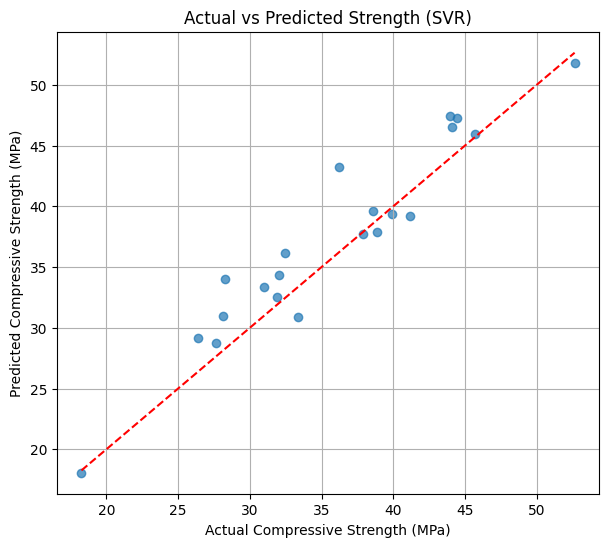

In [50]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')   # ideal line

plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Actual vs Predicted Strength (SVR)")
plt.grid(True)
plt.show()
